In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### EDA

In [2]:
data = pd.read_csv('./data/salaries.csv')
data

,kjønn,utdanning,erfaring,arbeidssted,arbeidssituasjon,fag,lønn,bonus?
0,mann,4,7,Agder,"in-house, privat sektor",AI / maskinlæring,865000,Nei
1,mann,5,2,Nordland,"in-house, offentlig/kommunal sektor",AI / maskinlæring,756000,Nei
2,mann,4,30,Oslo,konsulent,AI / maskinlæring,1500000,Nei
3,mann,5,25,Oslo,konsulent,AI / maskinlæring,1200000,Nei
4,mann,9,18,Oslo,"in-house, privat sektor",AI / maskinlæring,1200000,Nei
...,...,...,...,...,...,...,...,...
2677,mann,3,14,Vestfold og Telemark,"in-house, offentlig/kommunal sektor",UX / design,720000,Nei
2678,mann,5,8,Vestland,konsulent,UX / design,875000,Nei
2679,mann,0,23,Viken,"in-house, privat sektor",UX / design,1300000,Nei
2680,mann,3,15,Viken,konsulent,UX / design,1000000,Ja


### Data Cleaning and Preprocessing

In [3]:
# Renaming columns for clarity
data.columns = ['gender', 'education', 'experience', 'workplace', 'work_situation', 'field', 'salary', 'bonus']

# check missing values

missing_values = data.isnull().sum()
missing_values

gender            0
education         0
experience        0
workplace         0
work_situation    0
field             0
salary            0
bonus             0
dtype: int64

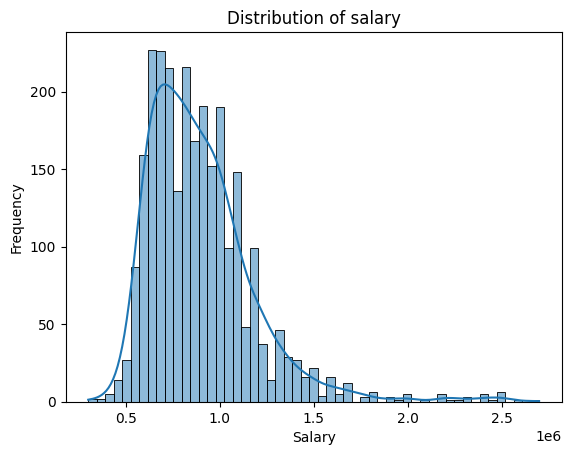

In [4]:
# Distribution of salaries
sns.histplot(data['salary'], kde=True)
plt.title('Distribution of salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

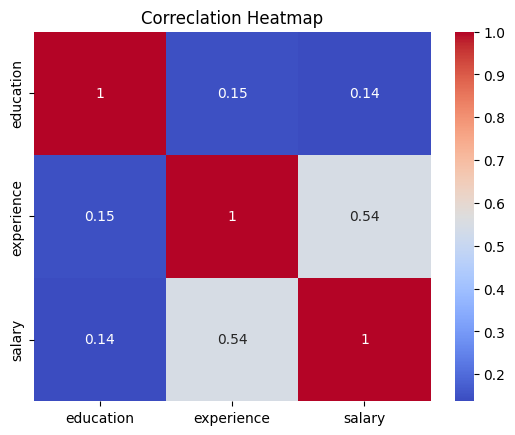

In [5]:
# Correlation heatmap
numeric_data = data.select_dtypes(include=[np.number])
correclation_matrix = numeric_data.corr()
sns.heatmap(correclation_matrix, annot=True, cmap='coolwarm')
plt.title('Correclation Heatmap')
plt.show()

### Predictive Modeling

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for modeling
X = data[['education', 'experience']]
y = data['salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(64550840601.53358, 0.25339654308514825)

Conclusion and Future Work
In this notebook, we explored the developer salary data for Norway in 2024. We cleaned the data, performed exploratory data analysis, and built a simple predictive model. While the linear regression model provided some insights, there is room for improvement. Future work could involve exploring more complex models, incorporating additional features, or even considering external data sources to enhance predictions.